# EDA - Exploring Music Data

In [19]:
!pip install -q wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 435.7 kB/s eta 0:00:00a 0:00:01


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
music_info_df = pd.read_csv('/Users/reggiebain/erdos/song-similarity-erdos-old/data/music_info.csv')
music_info_df.head(2)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.0,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.0,0.2070,0.651,174.426,4


In [17]:
music_info_df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

/var/folders/70/g0t97b0x2r964_f_p7d3sgwc0000gn/T/ipykernel_22938/1982975029.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


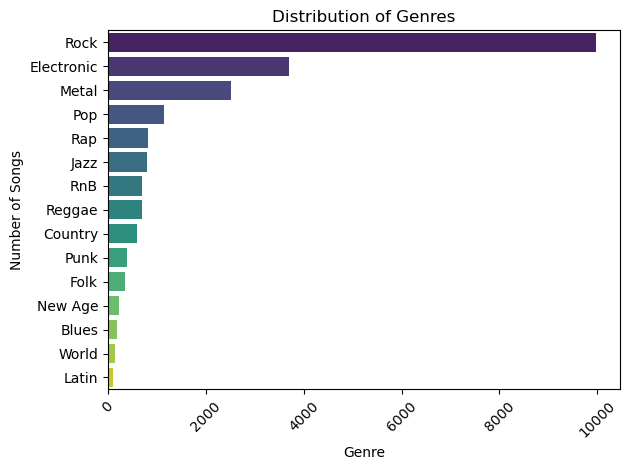

In [13]:

# Count the occurrences of each genre
genre_counts = music_info_df['genre'].value_counts()

# Convert the Series to a DataFrame for easier plotting (optional)
genre_df = genre_counts.reset_index()
genre_df.columns = ['Genre', 'Count']

# Create the bar plot
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')

# Customize the plot (optional)
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.savefig('../images/genre_dist.png')

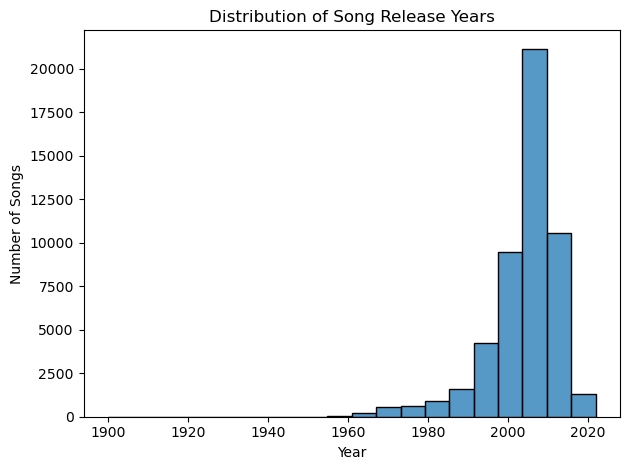

In [16]:
sns.histplot(music_info_df['year'], bins=20, kde=False)

# Customize the plot
plt.title('Distribution of Song Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
# Save the plot as a PNG file (optional)
plt.savefig('../images/year_distribution.png')

In [21]:
from collections import Counter
from wordcloud import WordCloud

# Assuming your DataFrame is called df and the tags column is 'tags'

# Split the tags into a list for each song
music_info_df['tags'] = music_info_df['tags'].str.split(',')

# Flatten the list of tags and count the occurrences
all_tags = [tag.strip() for sublist in music_info_df['tags'].dropna() for tag in sublist]
tag_counts = Counter(all_tags)

# Convert the counts to a DataFrame for easier plotting
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)


/var/folders/70/g0t97b0x2r964_f_p7d3sgwc0000gn/T/ipykernel_22938/4023828514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=tag_df.head(20), palette='viridis')


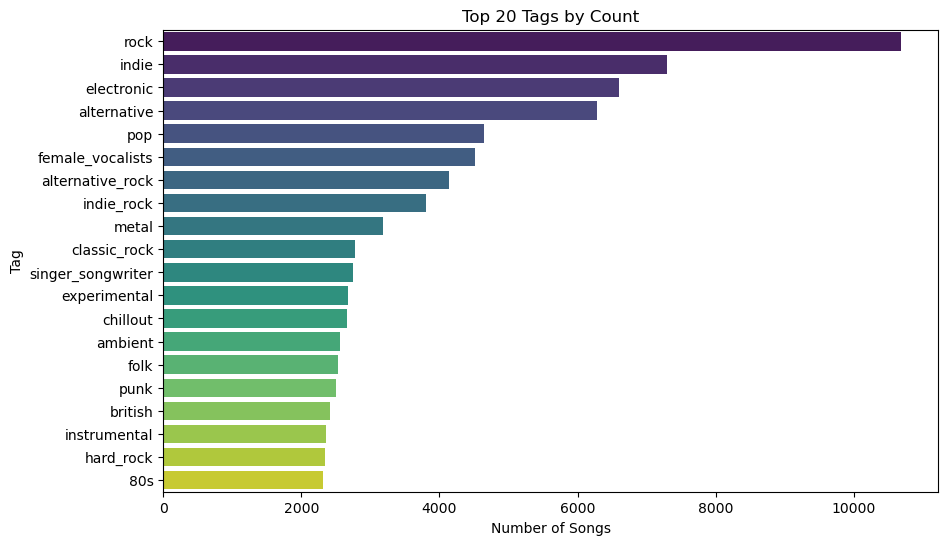

In [23]:
# Create the bar plot for the tag counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Tag', data=tag_df.head(20), palette='viridis')

# Customize the plot
plt.title('Top 20 Tags by Count')
plt.xlabel('Number of Songs')
plt.ylabel('Tag')

# Save the plot as a PNG file (optional)
plt.savefig('../images/tag_counts.png')

# Show the plot
plt.show()


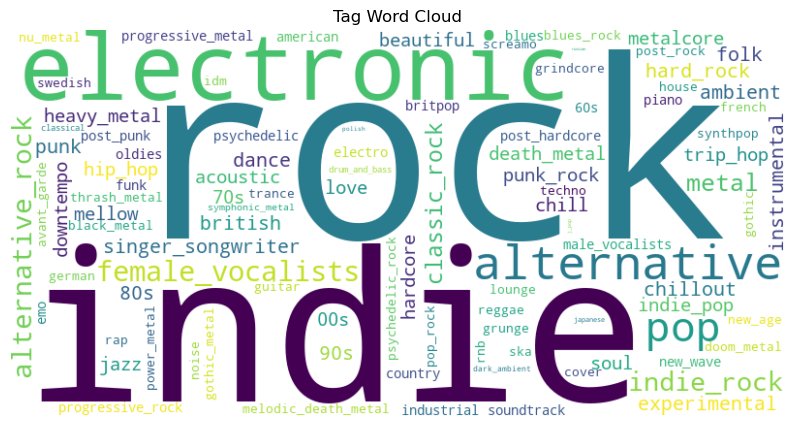

In [22]:
# Generate a word cloud from the tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Tag Word Cloud')

# Save the word cloud as a PNG file (optional)
plt.savefig('../images/tag_wordcloud.png')

# Show the word cloud
plt.show()
